In [2]:
path_in = "/mnt/faststorage/jintao/HNSCC/hecktor2021_train/resampled/" #change to your train folder



## CT statistics

In [ ]:
from multiprocessing import Pool
import glob
import numpy as np
import SimpleITK as sitk


def get_image_stats(pt):
    #_ct.nii.gz

    print("processing patient no. ", pt)

    CT_path = path_in + pt +'_ct.nii.gz'
    PET_path = path_in + pt +'_pt.nii.gz'


    pet_img = sitk.ReadImage(PET_path)
    pet = sitk.GetArrayFromImage(pet_img)

    ct_img = sitk.ReadImage(CT_path)
    ct = sitk.GetArrayFromImage(ct_img)

    fm  = ct > 0

    PTfm = pet*fm

    out_file = path_in + pt +'_ptfx.nii.gz'

    img_corr = sitk.GetImageFromArray(PTfm)
    img_corr.CopyInformation(pet_img)
    sitk.WriteImage(img_corr, out_file)
    
    

p = Pool(processes=8)              # start 8 worker processes
#print(parameterlist)
p.map(face_mask_filter, patient_names)
p.close()

## Visualize PET face mask filter

processing patient no.  CHGJ007


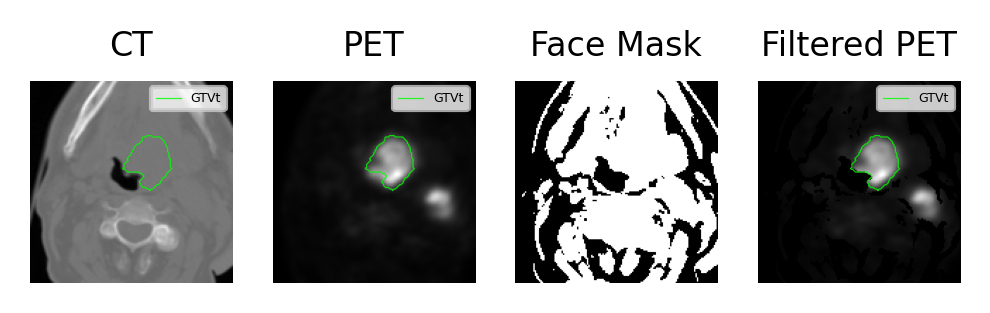

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
from multiprocessing import Pool
import glob
import numpy as np

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 5}

pt = 'CHGJ007'
#_ct.nii.gz

print("processing patient no. ", pt)

CT_path = path_in + pt +'_ct.nii.gz'
PET_path = path_in + pt +'_pt.nii.gz'
gtv_path = path_in + pt + '_gtvt.nii.gz'

pet_img = sitk.ReadImage(PET_path)
pet = sitk.GetArrayFromImage(pet_img)

ct_img = sitk.ReadImage(CT_path)
ct = sitk.GetArrayFromImage(ct_img)

fm  = ct > 0

PTfm = pet*fm

gtv_img = sitk.ReadImage(gtv_path)
gtv = sitk.GetArrayFromImage(gtv_img)
from skimage import measure

contours = measure.find_contours(gtv[70,:,:], 0.5)[0]

plt.figure(figsize=(4, 1.5), dpi=300)
plt.set_cmap('gray')
ax0 = plt.subplot(141)
ax0.imshow(ct[70])
ax0.axis('off')
ax0.set_title('CT', fontsize=8)
ax0.plot(contours[:, 1], contours[:, 0], linewidth=0.3, label = 'GTVt', c='lime',  alpha = 0.8)
plt.legend(fontsize=3)

ax1 = plt.subplot(142)
ax1.imshow(pet[70])
ax1.axis('off')
ax1.set_title('PET', fontsize=8)
ax1.plot(contours[:, 1], contours[:, 0], linewidth=0.3, label = 'GTVt',c='lime',  alpha = 0.8)
plt.legend(fontsize=3)
ax2 = plt.subplot(143)
ax2.imshow(fm[70])
ax2.axis('off')
ax2.set_title('Face Mask', fontsize=8)
ax3 = plt.subplot(144)
ax3.imshow(PTfm[70])
ax3.axis('off')
ax3.set_title('Filtered PET', fontsize=8)
ax3.plot(contours[:, 1], contours[:, 0], linewidth=0.3, label = 'GTVt',c='lime',  alpha = 0.8)
plt.legend(fontsize=3)
plt.savefig('petfm.png', dpi =300)

## Visualize PET clipping

processing patient no.  CHUM054


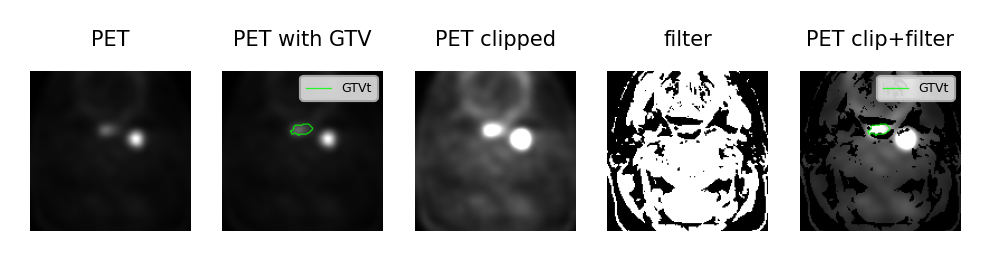

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
from multiprocessing import Pool
import glob
import numpy as np


pt = 'CHUM054'
#_ct.nii.gz

print("processing patient no. ", pt)

CT_path = path_in + pt +'_ct.nii.gz'
PET_path = path_in + pt +'_pt.nii.gz'
PETc_path = path_in + pt + '_ptc.nii.gz'
PETcf_path = path_in + pt + '_ptcfx.nii.gz'
gtv_path = path_in + pt + '_gtvt.nii.gz'


pet_img = sitk.ReadImage(PET_path)
pet = sitk.GetArrayFromImage(pet_img)
petc_img = sitk.ReadImage(PETc_path)
petc = sitk.GetArrayFromImage(petc_img)
petcf_img = sitk.ReadImage(PETcf_path)
petcf = sitk.GetArrayFromImage(petcf_img)

ct_img = sitk.ReadImage(CT_path)
ct = sitk.GetArrayFromImage(ct_img)

gtv_img = sitk.ReadImage(gtv_path)
gtv = sitk.GetArrayFromImage(gtv_img)
from skimage import measure

contours = measure.find_contours(gtv[107,:,:], 0.5)[0]


PET_path = path_in + pt + '_ptc.nii.gz'

fm  = ct > 0


plt.figure(figsize=(4, 1.5), dpi=300)
plt.set_cmap('gray')
ax0 = plt.subplot(151)
ax0.imshow(pet[107])
ax0.axis('off')
ax0.set_title('PET', fontsize=5)

ax01 = plt.subplot(152)
ax01.imshow(pet[107])
ax01.plot(contours[:, 1], contours[:, 0], linewidth=0.3, label='GTVt', c='lime',  alpha = 0.8)

#ax01.imshow(gtv[107],alpha=0.2)
ax01.axis('off')
ax01.set_title('PET with GTV', fontsize=5)
plt.legend(fontsize=3)
ax2 = plt.subplot(153)
ax2.imshow(petc[107])
ax2.axis('off')
ax2.set_title('PET clipped', fontsize=5)

ax1 = plt.subplot(154)
ax1.imshow(fm[107])
ax1.axis('off')
ax1.set_title('filter', fontsize=5)

ax3 = plt.subplot(155)
ax3.imshow(petcf[107])
ax3.axis('off')
ax3.set_title('PET clip+filter', fontsize=5)
ax3.plot(contours[:, 1], contours[:, 0], linewidth=0.3, label='GTVt',c='lime',  alpha = 0.8)
plt.legend(fontsize=3)
plt.savefig('petcf.png', dpi =300)